In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('D:/students_score.csv') #reading data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<function matplotlib.pyplot.show(*args, **kw)>

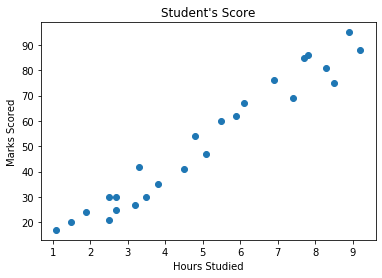

In [2]:
#plotting data
plt.scatter(x = data['Hours'], y = data['Scores'])
plt.title("Student's Score")
plt.xlabel("Hours Studied")
plt.ylabel("Marks Scored")
plt.show

In [3]:
#importing important libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [4]:
#splitting labels and features
x = data['Hours']
y = data['Scores']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2) #splitting training and testing data

X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

In [5]:
#initialising models
lr_mod = LinearRegression()
dt_mod = DecisionTreeRegressor()
rf_mod = RandomForestRegressor()
ada_mod = AdaBoostRegressor()

In [6]:
#fitting model on data
lr_mod.fit(X_train,y_train)
dt_mod.fit(X_train,y_train)
rf_mod.fit(X_train,y_train)
ada_mod.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [7]:
#predicting 
preds_tree = dt_mod.predict(X_test) 
preds_rf = rf_mod.predict(X_test)
preds_ada = ada_mod.predict(X_test)
preds_reg = lr_mod.predict(X_test)

In [8]:
def print_metrics(y_true, preds, model_name=None):
    '''
    INPUT:
    y_true - the y values that are actually true in the dataset (numpy array or pandas series)
    preds - the predictions for those values from some model (numpy array or pandas series)
    model_name - (str - optional) a name associated with the model if you would like to add it to the print statements 
    
    OUTPUT:
    None - prints the mse, mae, r2
    '''
    print('Mean Squared Error: ', format(mean_squared_error(y_true, preds)))
    print('Mean Absolute Error: ', format(mean_absolute_error(y_true, preds)))
    print('R2 Score: ', format(r2_score(y_true, preds)))
    print('\n\n')

In [9]:
# Print Decision Tree scores
print_metrics(y_test, preds_tree, 'tree')

# Print Random Forest scores
print_metrics(y_test, preds_rf, 'random forest')

# Print AdaBoost scores
print_metrics(y_test, preds_ada, 'adaboost')

# Linear Regression scores
print_metrics(y_test, preds_reg, 'linear reg')


Mean Squared Error:  60.6
Mean Absolute Error:  6.2
R2 Score:  0.9215269864290894



Mean Squared Error:  38.983109799999994
Mean Absolute Error:  4.972600000000002
R2 Score:  0.9495194372215892



Mean Squared Error:  37.0611111111111
Mean Absolute Error:  5.033333333333332
R2 Score:  0.9520082990895173



Mean Squared Error:  23.72869503254667
Mean Absolute Error:  4.076579759094274
R2 Score:  0.9692729008694879





In [10]:
#As adaboost model's performance was best will use it to predict
ada_mod.predict([[9.25]])

array([89.375])